In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## Neural Code

- Sensory signals or written language are converted into physical processes inside brains that contain some version of that information (code). "Adrienne Fairhall"  

**Recording from brain**

- **fMRI**: functional Magnetic Resonance, record brain while performing some tasks. MRI scan is just of organs/tissue, but an fMRI image of blood flow in the brain which tells which parts of the brain are being stimulated. Glucose is the brain's primary source of energy, but glucose is not stored in the brain. So when parts of the brain need energy to perform an action, more blood flows in to transport glucose to the active areas, thus more oxygen-rich blood enters the area.

- The person's head is placed inside the **fMRI** in middle of a large magnet, There is a scanner that measures perturbations in the magnetic field which happen due to change in blood oxygenation, **fMRI gives image at a scale of cubic millimeter which is the average activity of millions of neurons**.

- **EEG or electroencephalogram**: faster way, it captures the chnages in electric fields.

- **fMRI** and **EEG** are useful because they can noninvasively record neural activity in awake and behaving humans. However, it can not record directly from single neurons, the signals are averages of the approximate activity of large groups of neurons.


- **Electrode Array**: the device is made from amplifiers to amplify the tiny signal from single neurons ... The electrodes can be moved individually into tissues at different depth allowing to find active cells. 

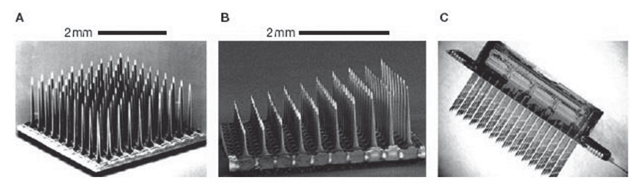

In [2]:
Image(filename= "multi_electrode.png", width=400)

- **Calcium Imaging** : optical microscopy technique to measure the calcium in the cell. Calcium imaging takes advantage of calcium indicators, fluorescent molecules that respond to the binding of calcium ions by changing their fluorescence properties. Since **Ca** enters the cell duting Action potenials, so the signal have the firing activity of the neuron.

### Internal recording
All these technqiues record external signals but all we want to record the internal activity of neurons. Why? Activity recorded externally is of lesser amplitude and requires much amplification because voltage changes decay quickly over short distances. Action potentials recorded internally have higher recorded amplitudes as a result of the proximity to the changes in voltage.  Also, when patched onto a small portion of the plasma membrane of a neuron, a researcher has the ability to discern the properties of single ion channels. Additionally, some internal recording techniques allow for the injection of certain chemicals and ions to which the researcher can record a change in internal activity of the patched cell.

### Eye
- Retina: it takes lights that is focused on the lense and convert this light inbto electric signal

- Choroid: layer between the sclera and retina

- Photoreceptors: outmost layer that detect light

- pigmented epithelium : absort lights to prevents visual echos

- rods used for low light detection, no detect of diffent colors like cone, responsable for peripheral vision

- cones: photoreceptos specialised for detect of different colors (differnt wavelengths of light)

- Retinal Gangelion cell (RGC): innermost cells with biploar cells synapsing with dendrites, it trasmit infor via action potenials to CNS.

- Optic nerve axons: info from all RGC cells 

- Amacrine cells: make connections with bipolar cells and RGC, hindre signals between photoreceptors and RGC 

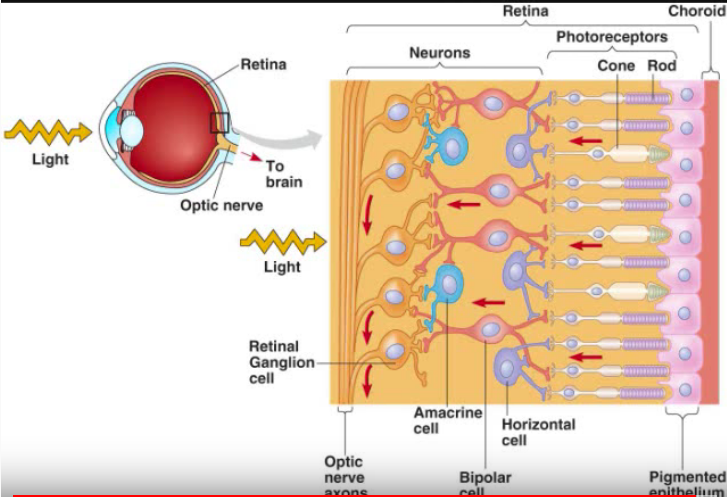

In [3]:
Image(filename= "retina_eye.png", width=600)

### Rastorplot, plot of neuron activity

record repreatedily the activity of the neuron at times using repreated stimulus experiment. A vertical bar in the raster plot indicates a strong response, meaning that one cell fires very reliably at a particular time during the stimulus presentation.  Weaker responses are represented by thin red bars (where the cell fires during some iterations but not others). As such, a weak response indicates that there is something about the feature (orientation of a bar of light in the video for example) that the cell likes, but is not the feature it responds to best (the orientation is off by a few degrees from what the cell prefers, for example).

- some cells can have common in feature detection

- The question is whether all the neurons response as a whole in response or separate? is it single neurons response or population level response.

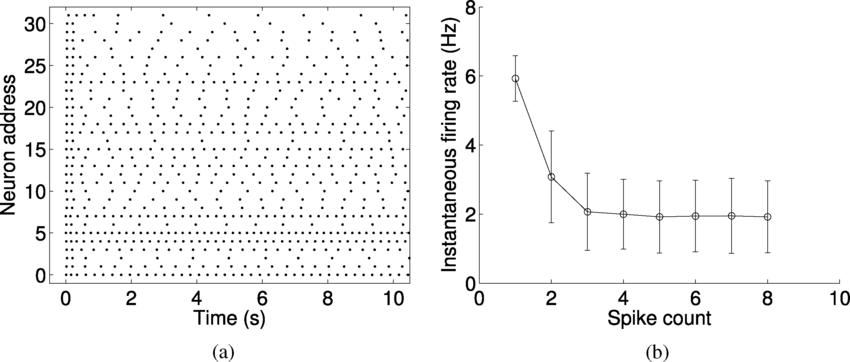

In [4]:
Image(filename= "rastorplot.png", width=600)

### Encoding vs Decoding

$$P(stimulus | response) = decoding$$

$$P(response | stimulus) = encoding$$

### Tuning Curve

graph of neuronal response (action potentials per unit time) as a function of stimulus, such as orientation, wavelength, or frequency. A neuron is “tuned” for the stimulus that evokes the greatest response, and the width of the curve from the half-maximum response on either side of the peak indicates how broadly or narrowly tuned a neuron is for a particular stimulus attribute. 

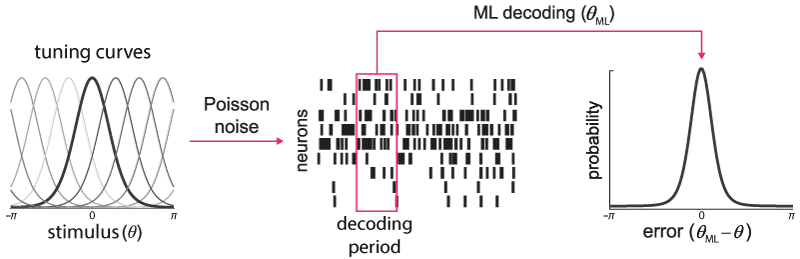

In [5]:
Image(filename= "tune_curve.gif", width=600)

**Complex selectivity**: Brain regions have increasing complexity of stimulus represenations starting from more geometric to become more semantic (Houses...). 

- **This is all about combination of simple features into complex features**.

- Notice also there is a feedback from areas that detect high complex features to the areas that detect simple geometric features. the represntations of high order fearures (semantic) will influence the initial representation of simple features in V1 or V4.

- what you think you're looking at can shape what yoy actually see

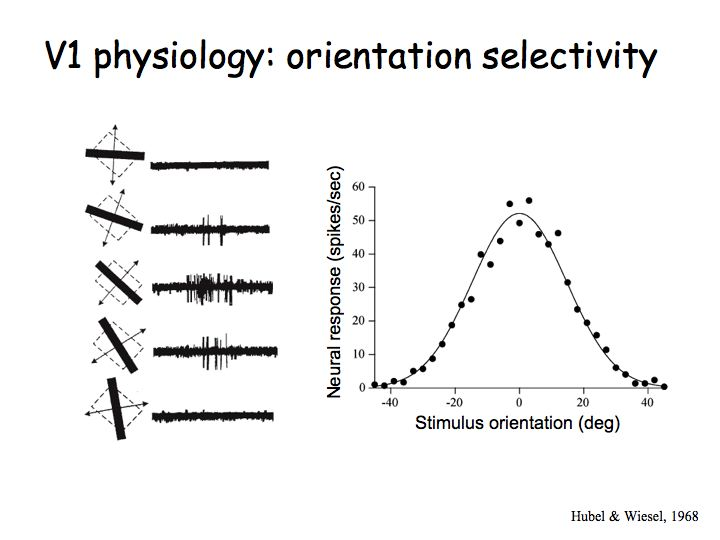

In [6]:
Image(filename= "selectivity.jpg", width=600)

## Linear Encoding

$p(response | stimulus)$

- response $r(t)$

- input stimulus $s(t)$

the simplist relation between the response and input is linear model

$r(t) = \phi * s(t)$

$\phi$ is just a scaler here

- $f(k)$ is the filter to be convolved with the input $S(t-k)$ but shifted back in time (indexed)

- for each spike in response, we look back to the event that trigger spike and grab it

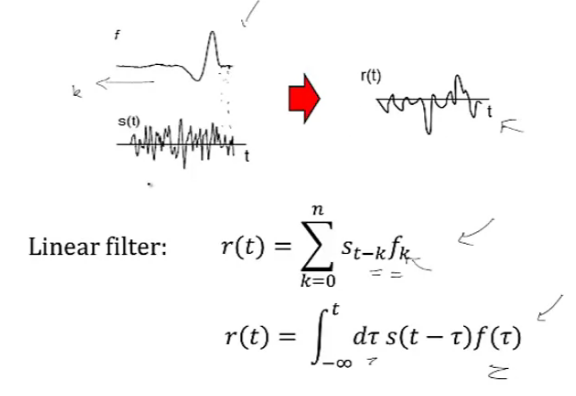

In [7]:
Image(filename= "temporal_fil.png", width=600)

- example:**(Running Average)** if $r(t)$ is proportional to average of $S(t)$, what is the $f(t)$? $f(t)=\frac{1}{N}$ for $N$ numbe rof samples.
    
- **(Leaky Average, reduction of the average response over time)** $f(t)$ is with exponential decay 

### Spatial filtering

- this works incase we work with visual objects, so instead of we just define $r(t), s(t)$ in time like in temporal filter, we define them in space.

So, response of neuron in certain receptive field can be computed like:

$r(x, y) = \sum_{x'=-n, y'=-n}^n s_{(x-x', y-y')} f_{x', y'}$

$r(x, y) = \int \int_{-\infty}^{\infty} s_{(x-x', y-y')} f_{x', y'} dx' dy'$

- stimulus is now pattern of light in the two dimenions

- This is very similar to **Diffrence of Gaussain** filters in Image analysis, is to detect local changes in image (edge detections)


### Spatio-Temporal filtering

- Put the two filters together, we need filter that depends on space and also time

$r(x, y) = \int \int \int s_{(x-x', y-y', t-\tau)} f_{x', y', \tau} dx' dy' d\tau$

## Non Linear Encoding: getting the components of the model:

The real response is combination of linear function of stimulus and non linear function

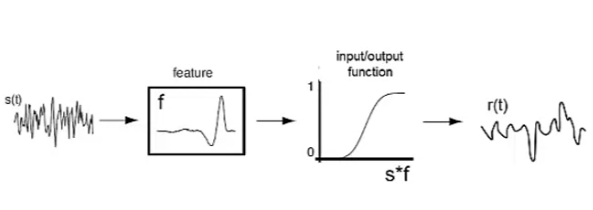

In [8]:
Image(filename= "non_linear_func.png", width=600)

### Features extraction (f)

we want to calculate the model from $p(response | stimulus)$

- One problem of this is the dimensionality, for one stimulus, we have differnt values (i.e: time series) and diffeent values (i.e. colors for visual stimulus), so, we need dimensionality reduction.

- **Sample the responses to variety of stimuli so we can know what is the input that trigger response** we discretize our waveform into discrete values, those values can be represent it as a vector in some vector space. the dimension of this vector is  number of points used in the discretization. If we discretize the signal into 100 chuncks, so, it's plotted into 100 dimensions.

$p(response | stimulus)$ >>> $p(response | s_1, s_2, s_3...)$

- **Gaussian white noise**: randomly varying input generated by choosing a new Gaussian random number at each time step. In practice, the time step sets a cut-off on the highest frequency that's represented in the signal. White noise, therefore, contains a very broad spectrum of frequencies, and in fact, depending on how the noise is smoothed in practical applications, almost all frequencies that are there are present in the signals with equal power.

- Each single random input noise is plotted as point into the dimension space based on how many discretizations of the signal **values at (t1, t2, t3, t4...)** while each **(t1, t2, t3, t4...)** are axes and also discrete values. then we will end up with gaussian distribution in dimension space. A multidimensional distribution is called **multivariate gaussian**

- the distribution of those points called prior distribution which is **gaussian prior stimulus distribution** which is before the application of the filter or the neural effect. 

- What is gaussian function ?

$p(x) = A*e^{-\frac{(x-x_o)^2}{2 \sigma^2}}$

$x_o$ is the center of distribution, mean

$\sigma$ is std, measure of it's width

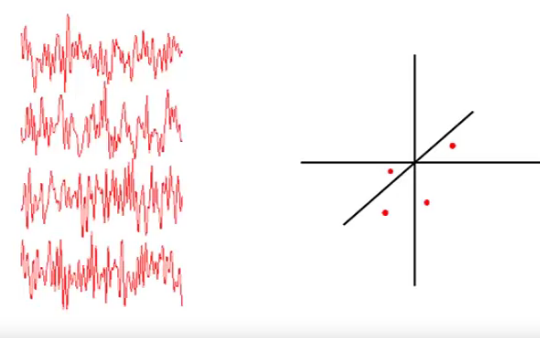

In [9]:
Image(filename= "white_noise.png", width=400)

- say that the blue points down here are stimuli that triggers the response. we take the average point and get the vector from zero to it **spike triggered average (f)** and that is the direction of the structure or the **feature that trigger the system to fire**. this is called **reverse correlation**

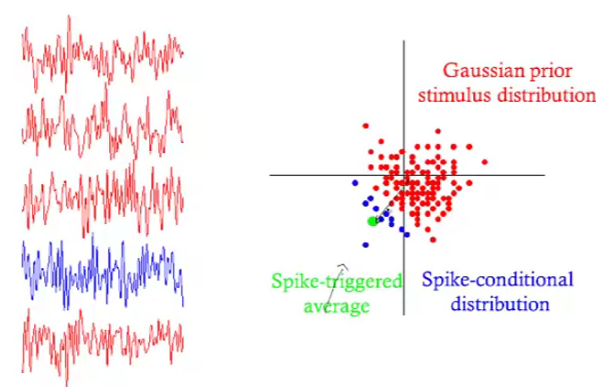

In [10]:
Image(filename= "spike_triggered_dis.png", width=400)

filtering = convolution = Projection of the stimulus space on the spike triggered average vector space, So, this filter takes high dimension stimulus and extract some features. **we project the stimulus into the spike triggered average (or feature f) = s1**

### Input/output function: the non linear term with respect the certain feature (f)

$p(spike | stimulus)$

but the stimulus now is only s1 which we extract the features from the stimulus

$p(spike | stimulus) = p(spike | s_1)$

using bayes' rule

$p(spike | s1) = \frac{p(s_1 | spike)*p(spike)}{p(s_1)}$

$p(s1)$ is the prior, or Gaussain white noise

$p(spike)$ is the spike conditional or overall rate of the spikes (frequency of spikes)

so we have $s_1$ and can make distributrion of it $p(s_1)$, and we have the times of spikes so, we pick the values of s1 at times of spikes and make distuibution of those $p(s_1 | spike)$. and then from Bayes, we got the $p(spike | s_1)$

- $P(spike)$ act as a scaling factor here, it's the prior probability of observing a spike. This is calculated independent of the stimulus.

- if prior $p(s)$ is the same as $p(s | spike)$, so the the stimulus is not special nor effective meaning that the stimulus has nothing to do with the neuron firing or we choose the wrong component. (no variation in response as function of s1)

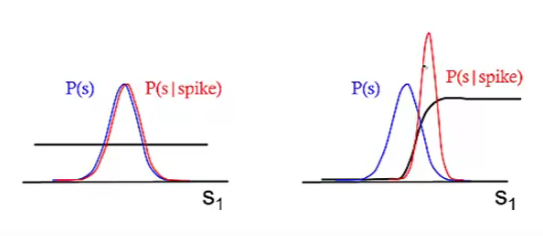

In [11]:
Image(filename= "input_output_curve.png", width=400)

Dimensionality Reduction : PCA ... helps with separtions also

#### Can we finda choice of $f$ so when we project the stimulus onto it, we got a prior $p(s)$ that is different from the conditional distribution $p(s|spike)$?

let's call it $p(s_f|spike)$

to get the difference between two distributions, there is standard way:

**Kullback-Leibler divergence** between $q(s)$ and $p(s)$ 

$D_{KL}(p(s), q(s)) = \int p(s) \ln_2{\frac{p(s)}{q(s)}} ds$

So, we want to maximize this 

$D_{KL}(p(s_f | spike), p(s_f))$

So, the approach is to take differnt $f$ and choose the value of $f$ that maximise the Kullback-Leibler divergence, this leads to maximally informative dimensions.

**Advantages of Kullback-Leibler divergence**:

- It gives us a way of seeking filters that maximize the discriminability of the spike-conditioned distribution and the prior.
- it does not require a specific structure for the distributions, such as Gaussians.

### Relationship between arrival time of spikes and response $r(t)$

every spike is generated independently with the probability that scaled by that time variant $r(t)$

the probability of the spike = probability of firing or not firing **binomial distribution**, however this is to be extended to **Poisson distribution** for all the spikes.

Poisson spiking assumes that each spike time is independent of all the others. However, in real neurons there exists a refractory period (usually on the order of a millisecond or so) that prevents the cell from spiking immediately after a previous spike has just occurred. The more times a cell spikes per second, the larger the role of this effect. There can also be more complex effects that render a neuron's spiking non-Poisson.

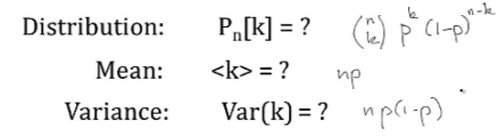

In [12]:
Image(filename= "binomial.png", width=400)

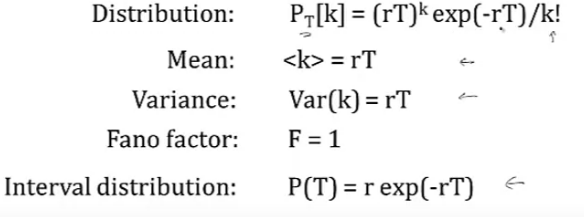

In [13]:
Image(filename= "poisson.png", width=400)

spike-generation model should take into account the history of the cell's own firing and the cell's interaction with other cells.

# Quiz

### Method of spike triggered average

- Record the stimulus over complete spike train

- Record all spike times.

- For every spike, add the stimulus values surrounding the spike into the spike-triggered average array. For example,a spike at 10.12s, the stimulus at 10.02s goes into the -0.10s bin, the stimulus at 10.03s goes into the -0.09s bin.Do this for a given time before and after the spike. Repeat for all spikes

- Once all the values are added into the array, divide by number of spikes to getspike-triggered average.

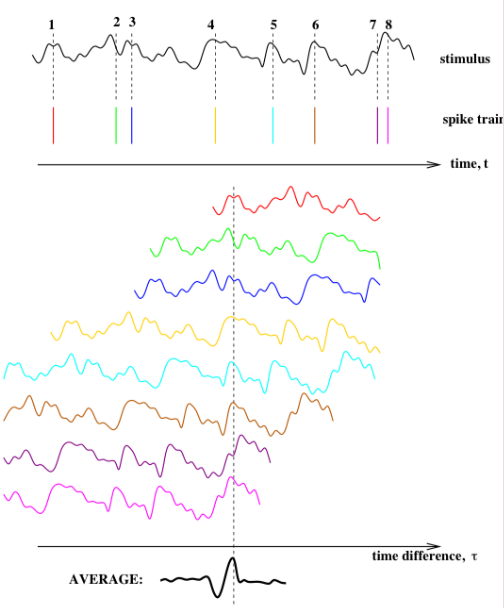

In [14]:
Image(filename= "avg.png", width=400)

In [17]:
import pickle

FILENAME = 'c1p8.pickle'

with open(FILENAME, 'rb') as f:
    data = pickle.load(f)

stim = data['stim']
rho = data['rho']
#stim: stimulus time-series
#rho: spike-train time-series
#num_timesteps: how many timesteps to use in STA

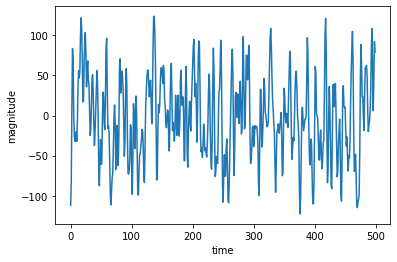

In [140]:
plt.xlabel('time')
plt.ylabel('magnitude')
plt.plot(stim[0:500])
plt.show()

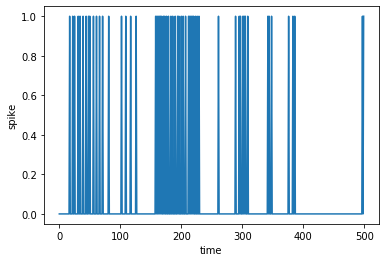

In [136]:
plt.xlabel('time')
plt.ylabel('spike')
plt.plot(rho[0:500])
plt.show()

In [137]:
# finds the indices of all of the spikes that occur after 300 ms
num_timesteps = 150
spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps
num_spikes = len(spike_times)
print(num_spikes)

53583


In [131]:
num_spikes = len(spike_times)
#initial STA
sta = np.zeros((num_timesteps,))

for i in np.arange(num_spikes):
    spike_time = spike_times[i]
    stim_window = stim[spike_time - num_timesteps + 1 : spike_time + 1]
    sta = sta + stim_window
sta =  sta/num_spikes

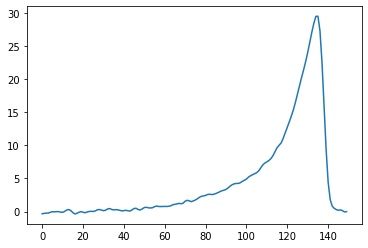

In [138]:
plt.plot(sta)
plt.show()

STA: The stimuli that precedes the spikes averaged over all stimuli that elicit neuron

## References:

https://www.coursera.org/learn/computational-neuroscience

Ghani N., 2018, Neural Decoding, http://www.columbia.edu/cu/appliedneuroshp/Spring2018/Spring18SHPAppliedNeuroLec4.pdf

https://www.youtube.com/watch?v=cr4zIXAmSRI

https://www.jameco.com/Jameco/workshop/HowItWorks/what-is-an-fmri-scan-and-how-does-it-work.html

https://www.bayslab.com/code/JN14/

https://www.researchgate.net/figure/Different-types-of-the-electrode-arrays-A-The-Utah-Electrode-Array-UEA-B-The-Utah_fig1_320649329
    
https://en.wikipedia.org/wiki/Calcium_imaging

https://www.neec.com/retinal-macular-diseases-boston/

https://www.youtube.com/watch?v=NfLgzTSL-U0

https://dictionary.apa.org/tuning-curve

https://en.wikipedia.org/wiki/Choroid

https://www.sciencedirect.com/topics/neuroscience/amacrine-cell

https://www.researchgate.net/figure/a-Raster-plot-showing-the-response-of-the-array-of-neurons-to-a-step-input-current_fig3_3303649

https://www.cns.nyu.edu/~david/courses/perception/lecturenotes/V1/lgn-V1.html